In [1]:
import glob
import numpy as np
import pandas as pd
from modules import show_mod

In [2]:
officeList = glob.glob("data/*")

for office in officeList:
    boxCountList = glob.glob(office + "/RiskOfInfection/*/BoxCount.csv")
    print(boxCountList)

['data/office2/RiskOfInfection/660_246_aout/BoxCount.csv', 'data/office2/RiskOfInfection/360_246_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_0/BoxCount.csv', 'data/office2/RiskOfInfection/360_82_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_246_aout/BoxCount.csv', 'data/office2/RiskOfInfection/360_164_aout/BoxCount.csv', 'data/office2/RiskOfInfection/660_246_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_164_aout/BoxCount.csv', 'data/office2/RiskOfInfection/660_0/BoxCount.csv', 'data/office2/RiskOfInfection/360_164_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_246_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_82_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_82_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_164_bout/BoxCount.csv', 'data/office2/RiskOfInfection/960_82_aout/BoxCount.csv', 'data/office2/RiskOfInfection/0_164_bout/BoxCount.csv', 'data/office2/RiskOfInfection/0_82_aout/BoxCount.csv', 'data/office2/RiskOfInfection/0_246_bout/Box

In [38]:
# a = np.loadtxt('data/office1/RiskOfInfection/0_0/BoxCount_A.csv', delimiter=',')

# boxCountFNAME = boxCountList[0]
boxCountFNAME = 'data/office1/RiskOfInfection/0_0/BoxCount.csv'
print(boxCountFNAME)
df = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office7/RiskOfInfection/960_246_bout/BoxCount.csv'
print(boxCountFNAME)
df_max = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office22/RiskOfInfection/360_82_bout/BoxCount.csv'
print(boxCountFNAME)
df_min = pd.read_csv(boxCountFNAME)

data/office1/RiskOfInfection/0_0/BoxCount.csv
data/office7/RiskOfInfection/960_246_bout/BoxCount.csv
data/office22/RiskOfInfection/360_82_bout/BoxCount.csv


- 荒木雅弘先生へメールしたが，「専門外」とのこと
- 学内に機械学習の専門家は他におられない？

$$ 1 - \mathrm{exp} \left( - \frac{N}{N_0} I \right) $$

$$ N_0 = 900 \space \mathrm{[viral copy / h]} $$
$$ N = nv \space \mathrm{[viral copy / h]} $$
$$ n = 10^{-7} \space \mathrm{[viral copy / ml]} $$

$$ I_{original} = 1 $$

$$ I_\alpha = 1.32 $$
$$ I_\delta = 1.5 I_\alpha $$
$$ I_{BA1} = 4.2 I_\delta $$
$$ I_{BA2} = 1.26 I_{BA1} $$
$$ I_{BA5} = 1.27 I_{BA2} $$
$$ I_{BA2.75} = 3.24 I_{BA5} $$

<!-- $$ I_\delta = 2.5 $$
$$ I_\omicron = 2.5 \cdot 1.4 $$
$$ I_{BA.5} = 1.3 I_{BA.2} $$
$$ I_{BA.2} = ? $$ -->

[BA.5とBA.2の比について](https://www.covid19-ai.jp/ja-jp/presentation/2022_rq1_simulations_for_infection_situations/articles/article367/)

In [39]:
I = 10.
def RateOfInfection(volume):
    """
    感染率計算
    飛沫シミュレーションは１分間しか行っていないので，１分間あたりに換算
    """
    ROI = 1. - np.exp( - volume * 1e7 / (900./60.) * I)
    return ROI

In [52]:
r = RateOfInfection(df['volume'])
r

a = df['RoI'].to_numpy()
a = r.to_numpy()
print(a.shape)
b = a.reshape(55, 60)
print(b.shape)

ROI_original = df['RoI'].to_numpy().reshape(55, 60)

(3300,)
(55, 60)


平均値：6.37%


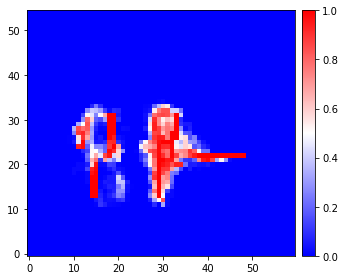

平均値：10.73%


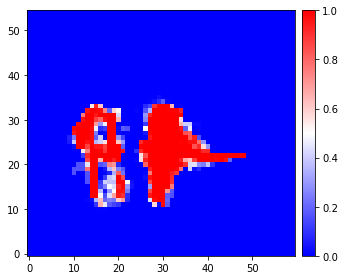

In [53]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_original.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_original, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(b.mean()))
#選んだ1個をプロット
show_mod.show_image(b, cbar=True, cmap=cmap, vmin=0)

In [47]:
ROI_max = df_max['RoI'].to_numpy().reshape(40, 90)
ROI_min = df_min['RoI'].to_numpy().reshape(65, 85)

平均値：9.15%


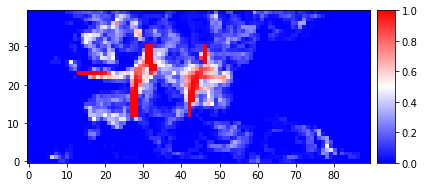

平均値：2.09%


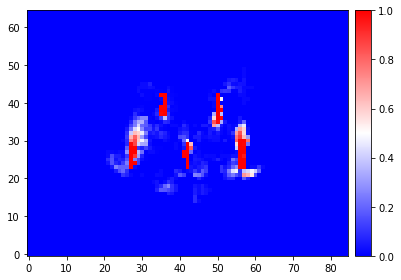

In [48]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_max.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_max, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(ROI_min.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_min, cbar=True, cmap=cmap, vmin=0)

In [62]:
threshold_array = np.linspace(0., 0.9, 10)

for threshold in threshold_array:
    print("====================================")
    print(threshold)
    rate_min = np.count_nonzero(ROI_min > threshold) / ROI_min.size
    rate_max = np.count_nonzero(ROI_max > threshold) / ROI_max.size
    print(rate_min, rate_max)
    print((rate_max - rate_min)/(rate_max + rate_min))


0.0
0.16760180995475113 0.57
0.5455493528004416
0.1
0.036380090497737556 0.25055555555555553
0.7464233461535092
0.2
0.02570135746606335 0.14694444444444443
0.702264900951535
0.30000000000000004
0.021357466063348415 0.09
0.6164160910199106
0.4
0.017918552036199097 0.06166666666666667
0.5497015066805647
0.5
0.01574660633484163 0.04416666666666667
0.47435332620051607
0.6000000000000001
0.014298642533936652 0.035833333333333335
0.4295599849567507
0.7000000000000001
0.01248868778280543 0.02861111111111111
0.3922749931190556
0.8
0.011583710407239819 0.023055555555555555
0.3311803766464676
0.9
0.010135746606334841 0.01861111111111111
0.29482751082156444
